# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5100, 58), (1276, 58), (5100,), (1276,))

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción
y_pred = clf.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

25513.57743728487

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
max_depths = np.arange(1, 30, 5)

rmses_train = []

rmses_test = []

for max_depth in max_depths:
    clf = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    y_pred = clf.predict(X_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
rmses_train, rmses_test

([26884.06654887286,
  20287.874363151426,
  14100.971579882917,
  6386.51360970568,
  1936.4326018182915,
  569.2369612090697],
 [26295.140253530644,
  21908.872820965524,
  22015.70972777555,
  24721.118356249983,
  25288.551659692173,
  24698.72146639805])

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

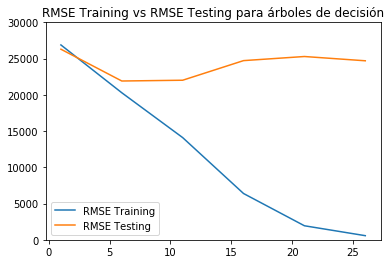

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(X_train, y_train)

y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

22733.040368844526

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
# Calculá los cambio en el rmse en esta celda
n_neighbors = np.arange(1, 30, 1)

rmses_train = []

rmses_test = []

for n_neighbors in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    y_pred = knn.predict(X_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
rmses_train, rmses_test

([717.7083160050084,
  13746.009016313237,
  16557.178260577828,
  17829.292761243214,
  18751.379229464594,
  19293.814806681385,
  19794.717263196573,
  20139.78742144739,
  20468.656317131932,
  20701.786822437127,
  20912.32302589446,
  21139.143085959997,
  21272.332798820524,
  21364.85500145764,
  21441.85527550086,
  21573.81242697147,
  21670.194530916495,
  21772.495151896972,
  21860.188681197473,
  21967.906130450498,
  22062.75264160703,
  22142.01003813332,
  22232.704205317248,
  22302.815306185767,
  22392.327817968937,
  22470.937588548288,
  22526.678661609505,
  22566.54520745387,
  22623.424659205648],
 [26314.375047026846,
  24378.43157503682,
  23324.776048948213,
  23028.274549889524,
  22733.040368844526,
  22731.27025782464,
  22620.31310691122,
  22634.689482726375,
  22608.863498855015,
  22568.211996792175,
  22479.91578951748,
  22442.04603011599,
  22457.046840823732,
  22566.696958539993,
  22566.465187327743,
  22525.328717065153,
  22483.195042198382,
 

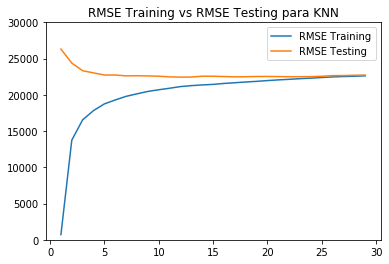

In [11]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [13]:
# Calculá en esta celda los cross_val_score
regressor = DecisionTreeRegressor(max_depth=5)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

scores = nmsq2rmse(scores)
scores

array([21339.61156931, 21160.1130315 , 22715.06886388, 21573.98699767,
       22617.76339868, 23120.38568626, 21706.71400993, 21951.1392186 ,
       21191.06057582, 22360.03707658])

In [14]:
print("Scores: ", scores)
print("Promedio: ", scores.mean())
print("Desvío estandar: ", scores.std())

Scores:  [21339.61156931 21160.1130315  22715.06886388 21573.98699767
 22617.76339868 23120.38568626 21706.71400993 21951.1392186
 21191.06057582 22360.03707658]
Promedio:  21973.588042821826
Desvío estandar:  658.5337562981455


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [15]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [16]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [17]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,108426.872,28426.872
1,128000.000,151372.531,23372.531
2,150000.000,151372.531,1372.531
3,85000.000,99219.122,14219.122
4,135000.000,130337.039,4662.961
5,135000.000,119967.914,15032.086
6,68000.000,87243.666,19243.666
7,110000.000,128379.238,18379.238
8,134000.000,154167.172,20167.172
9,110000.000,85248.777,24751.223
